# Part 1: Data Scraping and Preparation (10 pts)

## _Step 1: Scrape your competitor's data (10 pts)_

The code in this step simply sends a GET request to the Top 50 Solar Flares page, scrapes the HTML from the page, and stores the resulting data in a DataFrame.

In [1]:
%config IPCompleter.greedy=True

import requests
import pandas as pd
import numpy as np

from bs4 import BeautifulSoup
from datetime import datetime

In [2]:
url = 'https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares'
response = requests.get(url=url)
soup = BeautifulSoup(response.text, 'lxml')
#print(soup.prettify())

In [3]:
table = soup.find('table', {'class': 'table table-striped table-responsive-md'})
df = pd.read_html(str(table))
df = df[0]
df.columns = ['rank', 'x_class', 'date', 'region', 'start_time', 'max_time', 'end_time', 'movie']
df.index = np.arange(1, len(df) + 1)
df.head()

,rank,x_class,date,region,start_time,max_time,end_time,movie
1,1,X28.0,2003/11/04,486,19:29,19:53,20:06,MovieView archive
2,2,X20.0,2001/04/02,9393,21:32,21:51,22:03,MovieView archive
3,3,X17.2,2003/10/28,486,09:51,11:10,11:24,MovieView archive
4,4,X17.0,2005/09/07,808,17:17,17:40,18:03,MovieView archive
5,5,X14.4,2001/04/15,9415,13:19,13:50,13:55,MovieView archive


## _Step 2: Tidy the Top 50 Solar Flare Data (10 pts)_

The code in this step combines the date column and the start_time, max_time, and end_time columns into 3 corresponding datetime columns. It also reorders the columns, replaces any missing data with NaN, and converts the entries in the region column from strings to integers.

In [4]:
df = df.drop('movie', axis=1)
df.head()

,rank,x_class,date,region,start_time,max_time,end_time
1,1,X28.0,2003/11/04,486,19:29,19:53,20:06
2,2,X20.0,2001/04/02,9393,21:32,21:51,22:03
3,3,X17.2,2003/10/28,486,09:51,11:10,11:24
4,4,X17.0,2005/09/07,808,17:17,17:40,18:03
5,5,X14.4,2001/04/15,9415,13:19,13:50,13:55


In [5]:
for index, row in df.iterrows():
    df.set_value(index, 'start_time', pd.to_datetime(row['date'] + ' ' + row['start_time']))
    df.set_value(index, 'max_time', pd.to_datetime(row['date'] + ' ' + row['max_time']))
    df.set_value(index, 'end_time', pd.to_datetime(row['date'] + ' ' + row['end_time']))

df.drop('date', axis=1, inplace=True)
df = df[['rank', 'x_class', 'start_time', 'max_time', 'end_time', 'region']]
df.columns = ['rank', 'x_class', 'start_datetime', 'max_datetime', 'end_datetime', 'region']
df.replace(to_replace='-', value='NaN', inplace=True)
df['region'] = df['region'].astype(int, errors='ignore')
top_50_swl = df
df.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.


,rank,x_class,start_datetime,max_datetime,end_datetime,region
1,1,X28.0,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,486
2,2,X20.0,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,9393
3,3,X17.2,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,486
4,4,X17.0,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,808
5,5,X14.4,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,9415


## _Step 3: Scrape the NASA data (15 pts)_

The code in this step sends a GET request to the NASA page and scrapes the HTML from it. It then extracts the lines in the HTML code corresponding to the actual data and then stores them in a DataFrame.

In [6]:
url = 'http://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html'
response = requests.get(url=url)
soup = BeautifulSoup(response.text, 'lxml')
#print(soup.prettify())

In [7]:
table = soup.find('pre')

In [8]:
lines = table.text.split('\n')
lines = lines[12:len(lines) - 3]
lines = [line.split()[0:15] for line in lines]

df = pd.DataFrame(lines, columns=['start_date', 'start_time', 'end_date', 'end_time', 
                                  'start_frequency', 'end_frequency', 'flare_location', 'flare_region', 
                                  'flare_classification', 'cme_date', 'cme_time', 'cme_angle', 'cme_width', 'cme_speed', 'plots'])
df.index = np.arange(1, len(df) + 1)
df.head()

,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_date,cme_time,cme_angle,cme_width,cme_speed,plots
1,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312,PHTX
2,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878,PHTX
3,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464,PHTX
4,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296,PHTX
5,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712,PHTX


## _Step 4: Tidy the NASA Table (15 pts)_

The code in this step replaces all missing values with NaN, creates datetime columns out of separate date and time columns, 

In [9]:
df.replace(to_replace='------', value='NaN', inplace=True)
df.replace(to_replace='-----', value='NaN', inplace=True)
df.replace(to_replace='----', value='NaN', inplace=True)
df.replace(to_replace='---', value='NaN', inplace=True)
df.replace(to_replace='--/--', value='NaN', inplace=True)
df.replace(to_replace='--:--', value='NaN', inplace=True)
df.replace(to_replace='????', value='NaN', inplace=True)


In [10]:
df['is_halo'] = ['True' if row['cme_angle'] == 'Halo' else 'False' for index, row in df.iterrows()]
df['width_lower_bound'] = ['True' if '>' in row['cme_width'] else 'False' for index, row in df.iterrows()]

for index, row in df.iterrows():
    if row['is_halo'] == 'True':
        row['cme_angle'] = 'NaN'

    if row['width_lower_bound'] == 'True':
        row['cme_width'] = row['cme_width'].replace('>', '')
df.head()

,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_date,cme_time,cme_angle,cme_width,cme_speed,plots,is_halo,width_lower_bound
1,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312,PHTX,False,False
2,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,NaN,360,878,PHTX,True,False
3,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,NaN,360,464,PHTX,True,False
4,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296,PHTX,False,False
5,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712,PHTX,False,False


In [11]:
for index, row in df.iterrows():
    # Give best estimate for 24:00 since it is not supported by datetime
    if str(row['start_time']) == '24:00':
        row['start_time'] = pd.to_datetime('23:59')
    if str(row['end_time']) == '24:00':
        row['end_time'] = pd.to_datetime('23:59')
    if str(row['cme_time']) == '24:00':
        row['cme_time'] = pd.to_datetime('23:59')
        
    df.set_value(index, 'start_date', pd.to_datetime((str(row['start_date']) + ' ' + str(row['start_time']))
                                                     .replace('/', '-')))
    df.set_value(index, 'end_date', pd.to_datetime((str(row['start_date'])[0:4] + '-' + str(row['end_date']) 
                                                    + ' ' + str(row['end_time'])).replace('/', '-')))
    if row['cme_date'] != 'NaN' and row['cme_time'] != 'NaN':
        df.set_value(index, 'cme_date', pd.to_datetime((str(row['start_date'])[0:4] + '-' + str(row['cme_date']) 
                                                        + ' ' + str(row['cme_time'])).replace('/', '-')))
    
    # Add 0 to the end of classifications without a mantissa (for aesthetic purposes only)
    if row['flare_classification'][-1] == '.':
        row['flare_classification'] += '0'
    
df.drop(['start_time', 'end_time', 'cme_time'], axis=1, inplace=True)
df.columns = ['start_datetime', 'end_datetime', 'start_frequency', 'end_frequency', 
              'flare_location', 'flare_region', 'flare_classification', 'cme_datetime', 'cme_angle', 'cme_width', 
              'cme_speed', 'plots', 'is_halo', 'width_lower_bound']
df['start_frequency'] = df['start_frequency'].astype(int, errors='ignore')
df['end_frequency'] = df['end_frequency'].astype(int, errors='ignore')
df['flare_region'] = df['flare_region'].astype(int, errors='ignore')
df['cme_angle'] = df['cme_angle'].astype(int, errors='ignore')
df['cme_width'] = df['cme_width'].astype(int, errors='ignore')
df['cme_speed'] = df['cme_speed'].astype(int, errors='ignore')

df.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()


,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_datetime,cme_angle,cme_width,cme_speed,plots,is_halo,width_lower_bound
1,1997-04-01 14:00:00,1997-04-01 14:15:00,8000.0,4000.0,S25E16,8026,M1.3,1997-04-01 15:18:00,74.0,79,312.0,PHTX,False,False
2,1997-04-07 14:30:00,1997-04-07 17:30:00,11000.0,1000.0,S28E19,8027,C6.8,1997-04-07 14:27:00,NaN,360,878.0,PHTX,True,False
3,1997-05-12 05:15:00,1997-05-14 16:00:00,12000.0,80.0,N21W08,8038,C1.3,1997-05-12 05:30:00,NaN,360,464.0,PHTX,True,False
4,1997-05-21 20:20:00,1997-05-21 22:00:00,5000.0,500.0,N05W12,8040,M1.3,1997-05-21 21:00:00,263.0,165,296.0,PHTX,False,False
5,1997-09-23 21:53:00,1997-09-23 22:16:00,6000.0,2000.0,S29E25,8088,C1.4,1997-09-23 22:02:00,133.0,155,712.0,PHTX,False,False


# Part 2: Analysis

## _Question 1: Replication (10 pts)_

In [12]:
top_50_nasa = df.copy()
for index, row in top_50_nasa.iterrows():
    if len(row['flare_classification'][:-2]) == 2:
        row['flare_classification'] = row['flare_classification'][0] + '0' + row['flare_classification'][1:]
        
top_50_nasa.sort_values('flare_classification', axis=0, ascending=False, inplace=True)

for index, row in top_50_nasa.iterrows():
    if row['flare_classification'][1] == '0':
        row['flare_classification'] = row['flare_classification'][0] + row['flare_classification'][2:]

top_50_nasa.index = np.arange(1, len(top_50_nasa) + 1)
top_50_nasa = top_50_nasa.iloc[0:50]

### NASA Top 50 Data

In [13]:
top_50_nasa

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_datetime,cme_angle,cme_width,cme_speed,plots,is_halo,width_lower_bound
1,1997-11-06 12:20:00,1997-11-07 08:30:00,14000.0,100.0,S18W63,8100,X9.4,1997-11-06 12:10:00,NaN,360,1556.0,PHTX,True,False
2,2006-12-05 10:50:00,2006-12-05 20:00:00,14000.0,250.0,S07E68,10930,X9.0,NaN,NaN,NaN,NaN,PHTX,False,False
3,2003-11-02 17:30:00,2003-11-03 01:00:00,12000.0,250.0,S14W56,10486,X8.3,2003-11-02 17:30:00,NaN,360,2598.0,PHTX,True,False
4,2005-01-20 07:15:00,2005-01-20 16:30:00,14000.0,25.0,N14W61,10720,X7.1,2005-01-20 06:54:00,NaN,360,882.0,PHTX,True,False
5,2011-08-09 08:20:00,2011-08-09 08:35:00,16000.0,4000.0,N17W69,11263,X6.9,2011-08-09 08:12:00,NaN,360,1610.0,PHTX,True,False
6,2006-12-06 19:00:00,2006-12-09 01:59:00,16000.0,30.0,S05E64,10930,X6.5,NaN,NaN,NaN,NaN,PHTX,False,False
7,2005-09-09 19:45:00,2005-09-09 22:00:00,10000.0,50.0,S12E67,10808,X6.2,2005-09-09 19:48:00,NaN,360,2257.0,PHTX,True,False
8,2000-07-14 10:30:00,2000-07-15 14:30:00,14000.0,80.0,N22W07,9077,X5.7,2000-07-14 10:54:00,NaN,360,1674.0,PHTX,True,False
9,2001-04-06 19:35:00,2001-04-07 01:50:00,14000.0,230.0,S21E31,9415,X5.6,2001-04-06 19:30:00,NaN,360,1270.0,PHTX,True,False
10,2012-03-07 01:00:00,2012-03-08 19:00:00,16000.0,30.0,N17E27,11429,X5.4,2012-03-07 00:24:00,NaN,360,2684.0,PHTX,True,False


### Top 50 Solar Flares Data

In [14]:
top_50_swl.head(n=50)

,rank,x_class,start_datetime,max_datetime,end_datetime,region
1,1,X28.0,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,486
2,2,X20.0,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,9393
3,3,X17.2,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,486
4,4,X17.0,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,808
5,5,X14.4,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,9415
6,6,X10.0,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00,486
7,7,X9.4,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00,8100
8,8,X9.3,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00,2673
9,9,X9.0,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00,930
10,10,X8.3,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00,486


The data from SpaceWeatherLive is not very replicable by the data from NASA: although the classifications mostly match for the top 5 solar flares from both websites, there are many entries missing from the NASA data that are present in the SpaceWeatherLive data. Additionally, the start_datetime, end_datetime, and region columns from both sites do not match up well for any of the top 50. Some of the entries in the NASA dataset that share the same classification are also ranked differently than they are in the SpaceWeatherLive dataset.

## _Question 2: Integration (15 pts)_

In [15]:
top_50_nasa['swl_rank'] = ['NaN' for i in range(50)]

def get_best_match(swl_index, swl_row):
    cur_best_match = None
    cur_best_timedelta = 1440
    
    for nasa_index, nasa_row in top_50_nasa.iterrows():
        nasa_class = nasa_row['flare_classification']
        swl_class = swl_row['x_class']
        nasa_start = nasa_row['start_datetime']
        swl_start = swl_row['start_datetime']
        
        if abs(float(nasa_class[1:]) - float(swl_class[1:])) <= .5 and \
        abs(np.timedelta64(nasa_start - swl_start, 'm')) / np.timedelta64(1, 'm') <= cur_best_timedelta:
            cur_best_match = (nasa_index, swl_index)
            cur_best_timedelta = abs(np.timedelta64(nasa_start - swl_start, 'm') / np.timedelta64(1, 'm'))
    
    return cur_best_match

In [16]:
for index, row in top_50_swl.iterrows():
    best_match = get_best_match(index, row)
    
    if best_match is not None:
        top_50_nasa.loc[best_match[0]]['swl_rank'] = best_match[1]
        
top_50_nasa

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_datetime,cme_angle,cme_width,cme_speed,plots,is_halo,width_lower_bound,swl_rank
1,1997-11-06 12:20:00,1997-11-07 08:30:00,14000.0,100.0,S18W63,8100,X9.4,1997-11-06 12:10:00,NaN,360,1556.0,PHTX,True,False,NaN
2,2006-12-05 10:50:00,2006-12-05 20:00:00,14000.0,250.0,S07E68,10930,X9.0,NaN,NaN,NaN,NaN,PHTX,False,False,NaN
3,2003-11-02 17:30:00,2003-11-03 01:00:00,12000.0,250.0,S14W56,10486,X8.3,2003-11-02 17:30:00,NaN,360,2598.0,PHTX,True,False,NaN
4,2005-01-20 07:15:00,2005-01-20 16:30:00,14000.0,25.0,N14W61,10720,X7.1,2005-01-20 06:54:00,NaN,360,882.0,PHTX,True,False,NaN
5,2011-08-09 08:20:00,2011-08-09 08:35:00,16000.0,4000.0,N17W69,11263,X6.9,2011-08-09 08:12:00,NaN,360,1610.0,PHTX,True,False,NaN
6,2006-12-06 19:00:00,2006-12-09 01:59:00,16000.0,30.0,S05E64,10930,X6.5,NaN,NaN,NaN,NaN,PHTX,False,False,NaN
7,2005-09-09 19:45:00,2005-09-09 22:00:00,10000.0,50.0,S12E67,10808,X6.2,2005-09-09 19:48:00,NaN,360,2257.0,PHTX,True,False,NaN
8,2000-07-14 10:30:00,2000-07-15 14:30:00,14000.0,80.0,N22W07,9077,X5.7,2000-07-14 10:54:00,NaN,360,1674.0,PHTX,True,False,NaN
9,2001-04-06 19:35:00,2001-04-07 01:50:00,14000.0,230.0,S21E31,9415,X5.6,2001-04-06 19:30:00,NaN,360,1270.0,PHTX,True,False,NaN
10,2012-03-07 01:00:00,2012-03-08 19:00:00,16000.0,30.0,N17E27,11429,X5.4,2012-03-07 00:24:00,NaN,360,2684.0,PHTX,True,False,NaN


I define a best matching row as one that has a classification score that differs at most by 0.5 and one that differs in start time by at most 1 day.

## _Question 3: Analysis (10 pts)_

In [17]:
import matplotlib.pyplot as plt

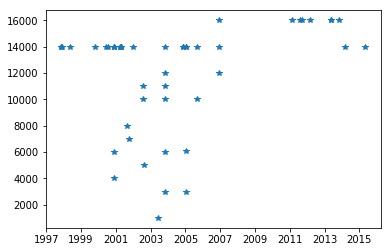

In [18]:
top_50_nasa.sort_values('start_frequency', ascending=True)
plt.plot(top_50_nasa['start_datetime'], top_50_nasa['start_frequency'], '*')